In [805]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/home/ethereum/SNCS/SNCS_Data/ProcessedData/All_Beauty.csv', names=["userId",	"productId",	"ratings",	"timestamp"])

user_encoder = LabelEncoder()
product_encoder = LabelEncoder()

df['userId'] = user_encoder.fit_transform(df['userId'])
df['productId'] = product_encoder.fit_transform(df['productId'])

df.describe(include='all') #to get an overview of the data

,userId,productId,ratings,timestamp
count,371345.000000,371345.000000,371345.000000,3.713450e+05
mean,12559.800003,162114.504065,4.112093,1.440742e+09
std,10290.338261,93488.228186,1.362099,6.962743e+07
min,0.000000,0.000000,1.000000,9.474624e+08
25%,2682.000000,81155.000000,4.000000,1.416096e+09
50%,10102.000000,162205.000000,5.000000,1.456963e+09
75%,21590.000000,242970.000000,5.000000,1.485562e+09
max,32585.000000,324037.000000,5.000000,1.538438e+09


# Checking Null values

In [806]:
missing_data = pd.DataFrame(df.isnull().mean()*100)
missing_data

,0
userId,0.0
productId,0.0
ratings,0.0
timestamp,0.0


All the columns are clean

In [807]:
# IQR
Q1 = np.percentile(df['ratings'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['ratings'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1


# Above Upper bound
upper = df['ratings'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df['ratings'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0         False
1         False
2         False
3         False
4         False
          ...  
371340    False
371341    False
371342    False
371343    False
371344    False
Name: ratings, Length: 371345, dtype: bool
(array([], dtype=int64),)
Lower bound: 0          True
1         False
2         False
3         False
4         False
          ...  
371340     True
371341    False
371342    False
371343     True
371344     True
Name: ratings, Length: 371345, dtype: bool
(array([     0,      7,      9, ..., 371340, 371343, 371344]),)


/tmp/ipykernel_26315/2755095297.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['ratings'], 25,
/tmp/ipykernel_26315/2755095297.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['ratings'], 75,


#Exploratory Data Analysis

##Total Count of each ratings

<Axes: ylabel='count'>

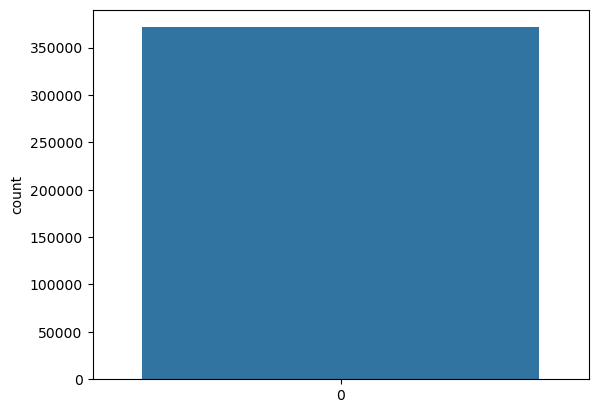

In [808]:
sns.countplot(df['ratings']) #total count of ratings.

In [809]:
len(df['userId'].unique())

32586

##Top Products based on sales

In [810]:
#Top 20 Products based on sales.

a = list(df['productId'].value_counts())
b = list(df['productId'].unique())
top_20_products = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['productId', 'Count'])
top_20_products

,productId,Count
0,74103,27
1,121769,23
2,12456,21
3,61246,21
4,254163,20
5,187447,18
6,1875,14
7,101783,14
8,301016,13
9,291606,13


<Axes: xlabel='productId', ylabel='Count'>

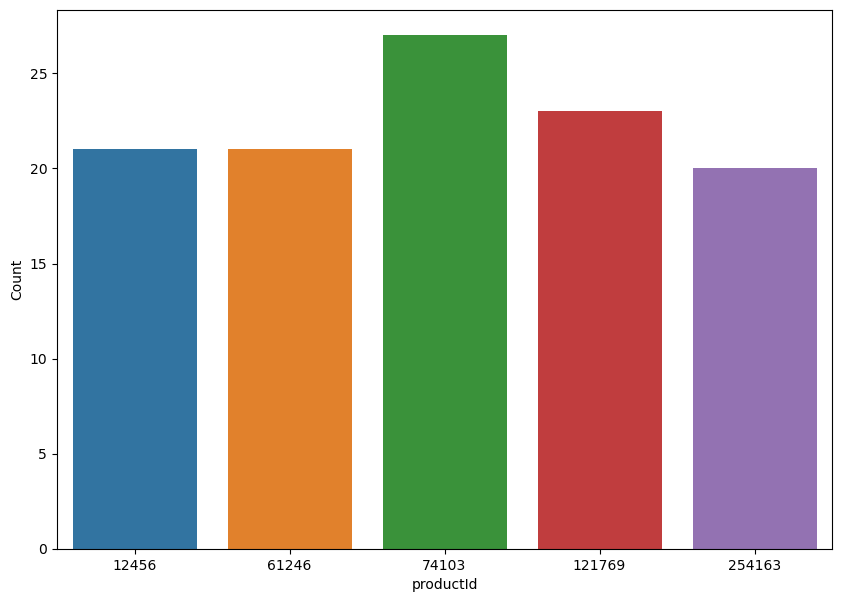

In [811]:
#Barplot of top 5 products.

plt.figure(figsize=(10,7))
sns.barplot(x=top_20_products['productId'].head(5),y=top_20_products['Count'].head(5))

In [812]:
#Top 20 products based on ratings

# Prod_R5 = list(df.loc[df['ratings']==5,'productId'])
# Prod_R4 = list(df.loc[df['ratings']==4,'productId'])[']=
# Prod_R3 = list(df.loc[df['ratings']==3,'productId'])
# Prod_R2 = list(df.loc[df['ratings']==2,'productId'])
# Prod_R1 = list(df.loc[df['ratings']==1,'productId'])
# # total_ratings = list(df['ratings'].value_counts())
# # total_ratings
# R5_count = dict((x,Prod_R5.count(x)) for x in set(Prod_R5))
# R4_count = dict((x,Prod_R4.count(x)) for x in set(Prod_R4))
# R3_count = dict((x,Prod_R3.count(x)) for x in set(Prod_R3))
# R2_count = dict((x,Prod_R2.count(x)) for x in set(Prod_R2))
# R1_count = dict((x,Prod_R1.count(x)) for x in set(Prod_R1))
# top_rating_products = topuser_rating_products[topuser_ratings_df['productId'].isin(top_prod)]

In [813]:
error_results = {}
RS_pred = pd.DataFrame()

## Number of Unique users

In [814]:
print('Number of unique users', len(df['userId'].unique()))

Number of unique users 32586


In [815]:
#top 20 users based on count of orders placed.

a = list(df['userId'].value_counts())
b = list(df['userId'].unique())
top_20_Users = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['userId', 'Count'])
top_20_Users

,userId,Count
0,1,8672
1,2,8341
2,23,4792
3,59,4544
4,60,4246
5,84,2959
6,87,2790
7,93,2249
8,94,2234
9,109,2190


In [816]:
# list(df.loc(df['ratings']>=4.0,df['userId'].value_counts()))

## Number of Unique products

In [817]:
print('Number of unique products', len(df['productId'].unique()))

Number of unique products 324038


## Different types of Ratings

In [818]:
print('Unique Ratings',df['ratings'].unique())

Unique Ratings [1. 4. 5. 2. 3.]


## Number of Products with good ratings

In [819]:
max_ratings1 = df[df['ratings'] >= 4.0]
print('Number of unique products rated high',len(max_ratings1['productId'].unique()))

Number of unique products rated high 245792


# Model Preparation

In [820]:
#Now we will drop timestamp column as it isn't much of help.

df.drop('timestamp',axis=1,inplace=True)

In [821]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size = 0.2, random_state=0)

In [822]:
train_data.head()

,userId,productId,ratings
130619,939,302648,2.0
234048,28385,305128,5.0
149127,10162,173544,5.0
217892,24886,178397,5.0
176290,16666,173913,5.0


In [823]:
test_data.head()

,userId,productId,ratings
221473,25680,238112,5.0
20759,666,203344,5.0
262652,1852,270088,5.0
58099,2206,195167,5.0
227661,26878,276744,5.0


## Model: Collaborative Filtering using surprise library

In [824]:
!pip install surprise

In [825]:
from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline,KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy

Since data is too huge, so a subset is taken which is top users who had given more than 5 ratings.

In [826]:
userId = df.groupby('userId').count()

In [827]:
top_user = userId[userId['ratings'] >= 5].index

In [828]:
topuser_ratings_df = df[df['userId'].isin(top_user)]

In [829]:
topuser_ratings_df.sort_values(by='ratings', ascending=False).head()

,userId,productId,ratings
165369,14107,270137,5.0
172542,16138,132574,5.0
172544,16138,148466,5.0
172545,16138,38717,5.0
172546,16138,133109,5.0


In [830]:
prodID = df.groupby('productId').count()

In [831]:
top_prod = prodID[prodID['ratings'] >= 10].index

In [832]:
top_ratings_df = topuser_ratings_df[topuser_ratings_df['productId'].isin(top_prod)]

In [833]:
top_ratings_df.sort_values(by='ratings', ascending=False).head()

,userId,productId,ratings
1766,59,219518,5.0
192534,19998,91388,5.0
193881,19998,34359,5.0
193850,19998,34359,5.0
193779,19998,34359,5.0


#### Conversion to surprise format

In [834]:
reader = Reader(rating_scale=(1, 5))

In [835]:
data = Dataset.load_from_df(top_ratings_df[['userId', 'productId', 'ratings']],reader)

#### Model training

In [836]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.3,random_state=0)


### KNNZscore

In [837]:
# Define and train the KNNWithZScore model
knn_zscore = KNNWithZScore(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
knn_zscore.fit(trainset)
# Evaluate on test set
test_pred_knn_zscore = knn_zscore.test(testset)
RS_pred["actual"] = [pred.r_ui for pred in test_pred_knn_zscore]
RS_pred["KNN(Zscore)"] = [pred.est for pred in test_pred_knn_zscore]

# Print first prediction
print("KNNWithZScore - First prediction:", test_pred_knn_zscore[0])
# Compute RMSE and MAE
print("KNNWithZScore - RMSE:", accuracy.rmse(test_pred_knn_zscore))
print("KNNWithZScore - MAE:", accuracy.mae(test_pred_knn_zscore))

error_results["KNN(Zscore)"] = [accuracy.rmse(test_pred_knn_zscore), accuracy.mae(test_pred_knn_zscore)]

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
KNNWithZScore - First prediction: user: 19998      item: 227291     r_ui = 5.00   est = 5.00   {'actual_k': 9, 'was_impossible': False}
RMSE: 0.9185
KNNWithZScore - RMSE: 0.9184756663258046
MAE:  0.5486
KNNWithZScore - MAE: 0.5485678372303386
RMSE: 0.9185
MAE:  0.5486


### Baselineonly

In [838]:
# Define and train the BaselineOnly model
baseline_only = BaselineOnly()
baseline_only.fit(trainset)
# Evaluate on test set
test_pred_baseline_only = baseline_only.test(testset)
RS_pred["baseline"] = [pred.est for pred in test_pred_baseline_only]

# Print first prediction
print("BaselineOnly - First prediction:", test_pred_baseline_only[0])
# Compute RMSE and MAE
print("BaselineOnly - RMSE:", accuracy.rmse(test_pred_baseline_only))
print("BaselineOnly - MAE:", accuracy.mae(test_pred_baseline_only))

error_results["baseline"] = [accuracy.rmse(test_pred_baseline_only), accuracy.mae(test_pred_baseline_only)]

Estimating biases using als...
BaselineOnly - First prediction: user: 19998      item: 227291     r_ui = 5.00   est = 4.83   {'was_impossible': False}
RMSE: 0.7943
BaselineOnly - RMSE: 0.7942819274490972
MAE:  0.5530
BaselineOnly - MAE: 0.5529601781236372
RMSE: 0.7943
MAE:  0.5530


### CoClustering

In [839]:
# Define and train the CoClustering model
coclustering = CoClustering()
coclustering.fit(trainset)
# Evaluate on test set
test_pred_coclustering = coclustering.test(testset)
RS_pred["CoClustering"] = [pred.est for pred in test_pred_coclustering]

# Print first prediction
print("CoClustering - First prediction:", test_pred_coclustering[0])
# Compute RMSE and MAE
print("CoClustering - RMSE:", accuracy.rmse(test_pred_coclustering))
print("CoClustering - MAE:", accuracy.mae(test_pred_coclustering))

error_results["CoClustering"] = [accuracy.rmse(test_pred_coclustering), accuracy.mae(test_pred_coclustering)]

CoClustering - First prediction: user: 19998      item: 227291     r_ui = 5.00   est = 5.00   {'was_impossible': False}
RMSE: 1.0270
CoClustering - RMSE: 1.0269819815471133
MAE:  0.6571
CoClustering - MAE: 0.6571376354905716
RMSE: 1.0270
MAE:  0.6571


### KNNBaseline

In [840]:
# Create and train the model
model = KNNBaseline(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
model.fit(trainset)

# Evaluate on test set
test_pred = model.test(testset)
RS_pred["KNN(Base)"] = [pred.est for pred in test_pred]

# Print first prediction
print(test_pred[0])

# Compute RMSE
print("rmse: ", accuracy.rmse(test_pred))

# Compute MAE
print("mae: ", accuracy.mae(test_pred))

error_results["KNN(Base)"] = [accuracy.rmse(test_pred), accuracy.mae(test_pred)]

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
user: 19998      item: 227291     r_ui = 5.00   est = 5.00   {'actual_k': 9, 'was_impossible': False}
RMSE: 0.7904
rmse:  0.790409193806567
MAE:  0.5205
mae:  0.5205353089915976
RMSE: 0.7904
MAE:  0.5205


### Normal Predictor

In [841]:
model = NormalPredictor()
model.fit(trainset)

# Evaluate on test set
test_pred = model.test(testset)
RS_pred["NormalPredictor"] = [pred.est for pred in test_pred]
# Print first prediction
print(test_pred[0])

# Compute RMSE
print("rmse: ", accuracy.rmse(test_pred))

# Compute MAE
print("mae: ", accuracy.mae(test_pred))

error_results["NormalPredictor"] = [accuracy.rmse(test_pred), accuracy.mae(test_pred)]

user: 19998      item: 227291     r_ui = 5.00   est = 5.00   {'was_impossible': False}
RMSE: 1.0766
rmse:  1.0765515145456717
MAE:  0.7703
mae:  0.7703320391164097
RMSE: 1.0766
MAE:  0.7703


### KNN Basic

In [842]:
# Create and train the model
model = KNNBasic(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
model.fit(trainset)

# Evaluate on test set
test_pred = model.test(testset)
RS_pred["KNN(Basic)"] = [pred.est for pred in test_pred]

# Print first prediction
print(test_pred[0])

# Compute RMSE
print("rmse: ", accuracy.rmse(test_pred))

# Compute MAE
print("mae: ", accuracy.mae(test_pred))

error_results["KNN(Basic)"] = [accuracy.rmse(test_pred), accuracy.mae(test_pred)]

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
user: 19998      item: 227291     r_ui = 5.00   est = 5.00   {'actual_k': 9, 'was_impossible': False}
RMSE: 0.9081
rmse:  0.9080861280684894
MAE:  0.6151
mae:  0.6151440423970467
RMSE: 0.9081
MAE:  0.6151


#### KNN with means

In [843]:
model = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
model.fit(trainset)

# Evalute on test set
test_pred = model.test(testset)
RS_pred["KNN(Means)"] = [pred.est for pred in test_pred]

print(test_pred[0])

# compute RMSE
print("rmse: ", accuracy.rmse(test_pred))

# compute MAE
print("mae: ", accuracy.mae(test_pred))

error_results["KNN(Means)"] = [accuracy.rmse(test_pred), accuracy.mae(test_pred)]

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
user: 19998      item: 227291     r_ui = 5.00   est = 5.00   {'actual_k': 9, 'was_impossible': False}
RMSE: 0.9185
rmse:  0.9184765655412915
MAE:  0.5486
mae:  0.5485574744088032
RMSE: 0.9185
MAE:  0.5486


#### SVD

In [844]:
svd_model = SVD(n_factors=50,reg_all=0.02)
svd_model.fit(trainset)

test_pred = svd_model.test(testset)
RS_pred["SVD"] = [pred.est for pred in test_pred]

# compute RMSE
print("rmse: ", accuracy.rmse(test_pred))

# compute MAE
print("mae: ", accuracy.mae(test_pred))

error_results["SVD"]= [accuracy.rmse(test_pred), accuracy.mae(test_pred)]

RMSE: 0.7612
rmse:  0.7612291587984437
MAE:  0.5034
mae:  0.5034283855663702
RMSE: 0.7612
MAE:  0.5034


# Recommending 5 Products.

In [845]:
from collections import defaultdict
def get_top_n(predictions, n=5):
  
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [846]:
top_n = get_top_n(test_pred, n=5)

In [847]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

19998 [227291, 227291, 227291, 34359, 238247]
16195 [4601]
565 [205134]
27199 [186892]
2065 [171362, 36119, 73068, 296760, 296760]
16950 [61347]
921 [49845, 80269, 80269, 213043, 213043]
26642 [4601]
1381 [36119, 73068]
17973 [238247]
1165 [227291]
7060 [36119]
29586 [312045, 312045, 4214, 4214, 4214]
10003 [49282]
2152 [237636, 237636, 213043, 80269, 213043]
9379 [296760]
1439 [285002]
27956 [49282]
5537 [91388]
678 [80269, 17246, 187318]
59 [219518]
6539 [287554, 287554, 287554, 287554]
8182 [273362]
27192 [186892]
4646 [285002]
16075 [116821]
23337 [168083]
16163 [186892]
3885 [131912]
1772 [237636, 239855, 213043]
1059 [171362, 131912]
25633 [75759]
6841 [131912]
9699 [136578]
2856 [116821, 91388]
2824 [91388]
24275 [125190]
4673 [136578]
28547 [73068]
16802 [49282]
30966 [4601]
16170 [219518]
22466 [73068]
10314 [186892]
22858 [49282]
31933 [242573]
2151 [125190, 125190]
1927 [162640]
17055 [162640]
29410 [136578]
21982 [239855]
16162 [219518]
30166 [168083]
16617 [172081]
22947 [

In [848]:
error_results

{'KNN(Zscore)': [0.9184756663258046, 0.5485678372303386],
 'baseline': [0.7942819274490972, 0.5529601781236372],
 'CoClustering': [1.0269819815471133, 0.6571376354905716],
 'KNN(Base)': [0.790409193806567, 0.5205353089915976],
 'NormalPredictor': [1.0765515145456717, 0.7703320391164097],
 'KNN(Basic)': [0.9080861280684894, 0.6151440423970467],
 'KNN(Means)': [0.9184765655412915, 0.5485574744088032],
 'SVD': [0.7612291587984437, 0.5034283855663702]}

In [850]:
RS_pred.head()

,actual,KNN(Zscore),baseline,CoClustering,KNN(Base),NormalPredictor,KNN(Basic),KNN(Means),SVD
0,"(19998, 227291, 5.0)","(19998, 227291, 5.0, 4.998261877172654, {'actu...","(19998, 227291, 5.0, 4.830479505632967, {'was_...","(19998, 227291, 5.0, 5, {'was_impossible': Fal...","(19998, 227291, 5.0, 5, {'actual_k': 9, 'was_i...","(19998, 227291, 5.0, 5, {'was_impossible': Fal...","(19998, 227291, 5.0, 5, {'actual_k': 9, 'was_i...","(19998, 227291, 5.0, 4.998261877172654, {'actu...","(19998, 227291, 5.0, 4.951447351595428, {'was_..."
1,"(16195, 4601, 5.0)","(16195, 4601, 5.0, 4.538226299694189, {'was_im...","(16195, 4601, 5.0, 4.682557885539537, {'was_im...","(16195, 4601, 5.0, 4.538226299694189, {'was_im...","(16195, 4601, 5.0, 4.682557885539537, {'was_im...","(16195, 4601, 5.0, 4.78885243671348, {'was_imp...","(16195, 4601, 5.0, 4.538226299694189, {'was_im...","(16195, 4601, 5.0, 4.538226299694189, {'was_im...","(16195, 4601, 5.0, 4.744235889335578, {'was_im..."
2,"(565, 205134, 5.0)","(565, 205134, 5.0, 4.5, {'actual_k': 5, 'was_i...","(565, 205134, 5.0, 4.539729029039523, {'was_im...","(565, 205134, 5.0, 4.42523291925466, {'was_imp...","(565, 205134, 5.0, 4.539729029039523, {'actual...","(565, 205134, 5.0, 4.050362870388411, {'was_im...","(565, 205134, 5.0, 4.538226299694189, {'was_im...","(565, 205134, 5.0, 4.5, {'actual_k': 5, 'was_i...","(565, 205134, 5.0, 4.474741922281375, {'was_im..."
3,"(27199, 186892, 3.0)","(27199, 186892, 3.0, 4.538226299694189, {'was_...","(27199, 186892, 3.0, 4.494111523196044, {'was_...","(27199, 186892, 3.0, 4.538226299694189, {'was_...","(27199, 186892, 3.0, 4.494111523196044, {'was_...","(27199, 186892, 3.0, 4.254720514990601, {'was_...","(27199, 186892, 3.0, 4.538226299694189, {'was_...","(27199, 186892, 3.0, 4.538226299694189, {'was_...","(27199, 186892, 3.0, 4.490387626538262, {'was_..."
4,"(2065, 36119, 4.0)","(2065, 36119, 4.0, 4.285714285714286, {'actual...","(2065, 36119, 4.0, 4.432070692951203, {'was_im...","(2065, 36119, 4.0, 3.5539480374617023, {'was_i...","(2065, 36119, 4.0, 4.432070692951203, {'actual...","(2065, 36119, 4.0, 4.534067360586755, {'was_im...","(2065, 36119, 4.0, 4.538226299694189, {'was_im...","(2065, 36119, 4.0, 4.285714285714286, {'actual...","(2065, 36119, 4.0, 4.372690997065206, {'was_im..."
